In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

# Activity: Normal Distributions

The cell below will load in a dataset from Inside Airbnb (http://insideairbnb.com/get-the-data.html) that has details of over 2000 Airbnb listings in Asheville, NC through February 17, 2021. It includes information about the name of the property, the zip code it's in, price, and many other fields.

Today, we'll be investigating how we might be able to estimate the average price for a night at an Airbnb. There were a small number (6) listings with prices over 1000 dollars which were removed.

**Throughout this activity, we are assuming that we don't have access to the full population to imagine how we might be able to make an estimate about the population mean from a single sample.** As a result, we will try not to inspect the full dataset as much as possible.

In [24]:
asheville = Table.read_table('data/asheville-airbnb.csv').where('price', are.below(1000))
asheville.show(5)

id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
108061,Walk to stores/parks/downtown. Fenced yard/Pets OK,320564,Lisa,28801,35.6067,-82.5556,Entire home/apt,82,30,89,11/30/2019,0.78,2,242
155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,28806,35.5786,-82.5958,Entire home/apt,90,1,289,2/13/2021,2.48,7,310
156805,"Private Room ""Ader"" at BPS Hostel",746673,BonPaul,28806,35.5786,-82.5958,Private room,66,1,67,1/1/2020,0.58,7,16
156926,"Mixed Dorm ""Top Bunk #1"" at BPS Hostel",746673,BonPaul,28806,35.5786,-82.5958,Shared room,31,1,282,12/31/2020,2.45,7,281
160594,Historic Grove Park,769252,Elizabeth,28801,35.6144,-82.5413,Private room,125,30,58,10/19/2015,0.5,1,0


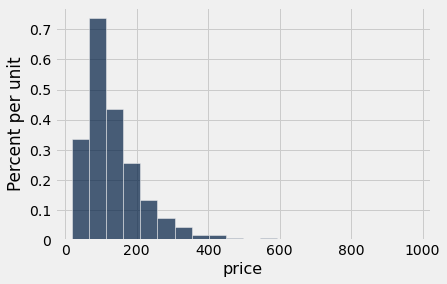

In [23]:
asheville.hist('price', bins = 20)

## Pick a sample size

If we want to estimate the population mean, we have to make a few choices. As we've seen, larger sample sizes produce more narrow confidence intervals, meaning we have a more precise estimate. However, larger samples are more expensive to take in real life (you have to spend either more time or more money to get more data in your sample). As such, in practice you'll typically decide up front how wide your interval is allowed to be, and then set to work creating a sample of sufficient size to produce an interval of that width. If you were to choose a smaller sample size, your interval would not be narrow enough to provide the required accuracy, a larger sample size will cost more money to provide accuracy you already decided you didn't need. So, how do we choose the correct size? 

Let's start by just picking a sample size to draw from the population.

In [41]:
sample_size = 50
my_sample = asheville.sample(sample_size)

my_sample.show(5)

id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
47887711,Contemporary Jewel with waterfall,386013240,Alex,28805,35.5999,-82.4664,Entire home/apt,286,2,0,nan,nan,1,349
7045303,Private Basement Suite in Walkable West Asheville,6676667,Elizabeth,28806,35.5782,-82.6032,Private room,125,2,99,12/1/2020,1.45,1,365
39007688,"Mountain Air - Peace, Comfort, and Convenience!",92301073,Michael,28805,35.6234,-82.4774,Entire home/apt,110,2,47,12/28/2020,2.95,1,104
22702396,"Immaculate, Traditional Home in S. Asheville BR2",158275564,Tony,28732,35.4363,-82.5227,Private room,39,1,184,2/7/2021,4.87,4,258
28608801,Modern Gem - Peaceful Quiet Getaway,89847496,Douglas,28805,35.5971,-82.4767,Entire home/apt,146,3,84,1/2/2021,2.91,1,128


Let's see what type of estimate a sample of this size generates:

In [42]:
def one_bootstrap_mean():
    return np.mean(my_sample.sample().column('price'))

In [43]:
bootstrap_means = make_array()

for i in np.arange(1000):
    new_mean = one_bootstrap_mean()
    bootstrap_means = np.append(bootstrap_means, new_mean)
    
left = percentile(2.5, bootstrap_means)
right = percentile(97.5, bootstrap_means)

95% CI: ( 118.92 , 163.86 )
CI Width: 44.94000000000001


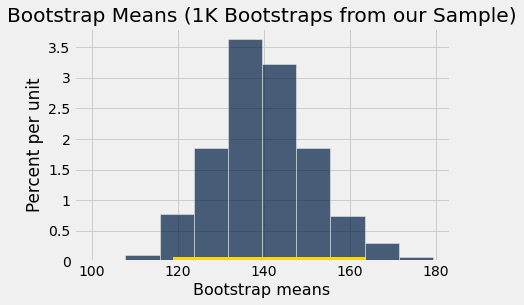

In [44]:
Table().with_column('Bootstrap means', bootstrap_means).hist()

plots.plot([left,right], [0,0], color="gold", lw=8, zorder=1);
plots.title('Bootstrap Means (1K Bootstraps from our Sample)');
print("95% CI: (", left, ",", right,")")
print("CI Width:", right-left)